## Activation Functions
   Activation functions are nonlinearities introduced in a neural network to capture complex relationships in data.
   It determines the output or activation level of a neuron based on the weighted sum of its inputs.
   - Sigmoid
   - Tanh
   - ReLu
   - Leaky ReLu
   - Softmax

### Sigmoid 
The sigmoid activation function also known as the logistic function is a mathematical function commonly used in machine learning. It takes any real value and squashes it into the range between 0 and 1.

$$
sigmoid = \frac{1}{1+e^{-x}}
$$

The sigmoid activation function is used in binary classification tasks to produce probabilities that an input belongs to a certain class. It is differentiable and its output range makes it suitable for modeling nonlinear relationships and mapping inputs to probabilities.

But sigmoid function saturates (i.e. produces extreme valued outputs) very quickly and for a majority of the inputs leads to the gradients becoming either zero or diverging to an overflowing floating point value (vanishing gradient problem). Therefore, it is rare to see sigmoid units used in neural networks other than at the output, where the squashing property allows one to interpret outputs as probabilities.

In [2]:
import math
import torch
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [4]:
sigmoid(100)

1.0

In [5]:
sigmoid(0)

0.5

In [6]:
sigmoid(1.23)

0.7738185742694538

In [7]:
sigmoid(-11)

1.670142184809518e-05

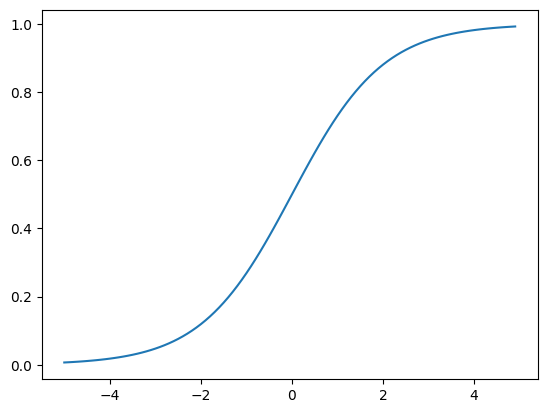

In [11]:
# sigmoid with torch
x = torch.arange(-5., 5., 0.1) 
y = torch.sigmoid(x) 
plt.plot(x.numpy(), y.numpy()) 
plt.show()

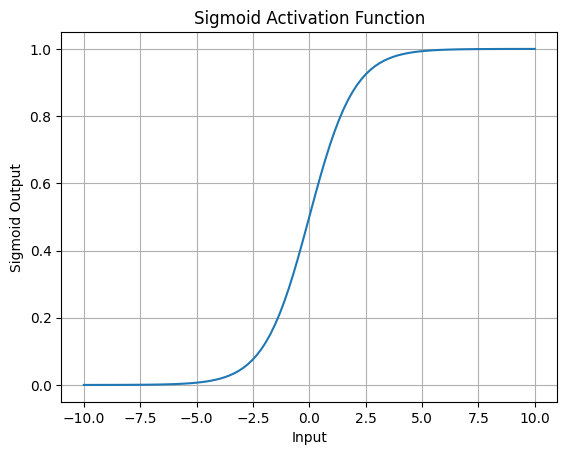

In [12]:
# with numpy
x = np.linspace(-10, 10, 100) 
y = 1 / (1 + np.exp(-x)) 

plt.plot(x, y)
plt.xlabel('Input')
plt.ylabel('Sigmoid Output')
plt.title('Sigmoid Activation Function')
plt.grid(True)
plt.show()

### Tanh
The tanh activation function is a cosmetically different variant of the sigmoid that can maps the input to a range between -1 and 1.

$$
tanh = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}
$$

The tanh activation function is symmetric around the origin providing both positive and negative outputs. It is useful for capturing nonlinear relationships and is often used in recurrent neural networks (RNNs) and hidden layers of feedforward neural networks.

In [13]:
def tanh(x):
  return (math.exp(x) - math.exp(-x)) / (math.exp(x) + math.exp(-x))

In [14]:
tanh(100)

1.0

In [15]:
tanh(-23)

-1.0

In [16]:
tanh(1)

0.7615941559557649

In [17]:
tanh(0.5)

0.4621171572600098

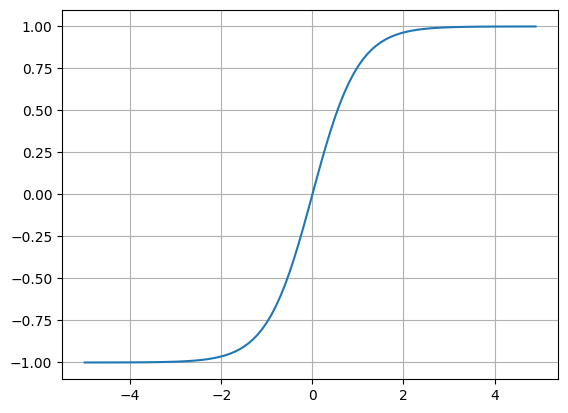

In [18]:
# with torch
x = torch.arange(-5., 5., 0.1) 
y = torch.tanh(x) 

plt.plot(x.numpy(), y.numpy()) 
plt.grid(True)
plt.show()

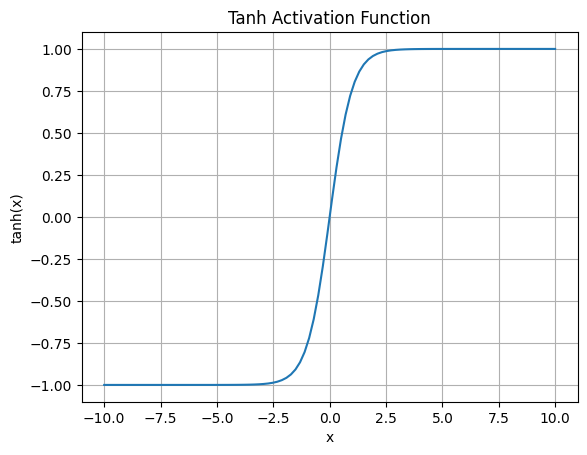

In [19]:
# with numpy
x = np.linspace(-10, 10, 100)
tanh = np.tanh(x)

plt.plot(x, tanh)
plt.title("Tanh Activation Function")
plt.xlabel("x")
plt.ylabel("tanh(x)")
plt.grid(True)
plt.show()

### ReLu
The Rectified Linear Unit (ReLU) activation function is most important function in neural networks. It applies a simple thresholding operation to the input values, transforming negative values to zero and leaving positive values unchanged which helps with the vanishing gradient problem.

$$
f(x) =  max(0, x)
$$

ReLU has become widely popular and is often used in deep learning architectures due to its ability to alleviate the vanishing gradient problem and promote faster convergence during training.

In [20]:
def relu(x):
    return max(0,x)

In [23]:
relu(-23) # neg -> 0

0

In [22]:
relu(1.1)

1.1

In [24]:
relu(45)

45

In [25]:
relu(-0.44)

0

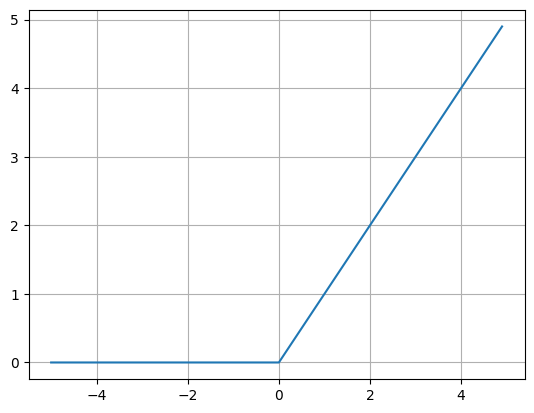

In [26]:
# with torch
relu = torch.nn.ReLU()
x = torch.arange(-5., 5., 0.1) 
y = relu(x)

plt.plot(x.numpy(), y.numpy()) 
plt.grid(True)
plt.show()

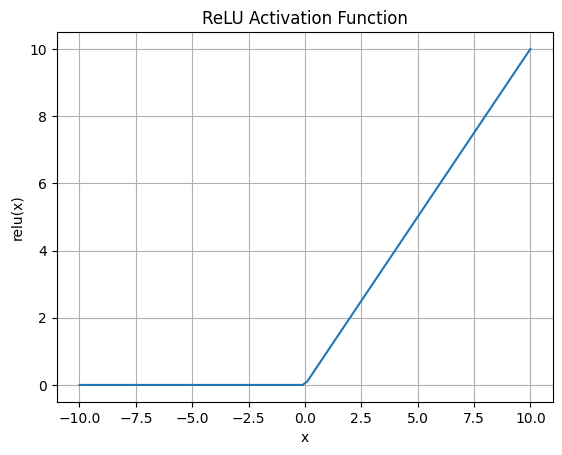

In [27]:
# with numpy
x = np.linspace(-10, 10, 100)
relu = np.maximum(0, x)

plt.plot(x, relu)
plt.title("ReLU Activation Function")
plt.xlabel("x")
plt.ylabel("relu(x)")
plt.grid(True)
plt.show()

### Leaky ReLu
The Leaky ReLU activation function is a variation of the ReLu activation function. It also applies thresholding operation to the input values setting negative values to zero. However, unlike ReLU the Leaky ReLU allows a small non-zero gradient for negative inputs, which helps address the "dying ReLU" (where over time certain outputs in the network can simply become zero and never revive again) problem where neurons can become non-responsive.

$$
f(x) = max(ax, x)
$$
f(x): represents the Leaky ReLU output for a given input x
a: small positive constant (typically around 0.1)

In [28]:
def leaky_relu(x, alpha=0.1):
    return max(x, alpha * x)

In [30]:
leaky_relu(-100) # small non zero output

-10.0

In [31]:
leaky_relu(-0.10000)

-0.010000000000000002

In [32]:
leaky_relu(88)

88

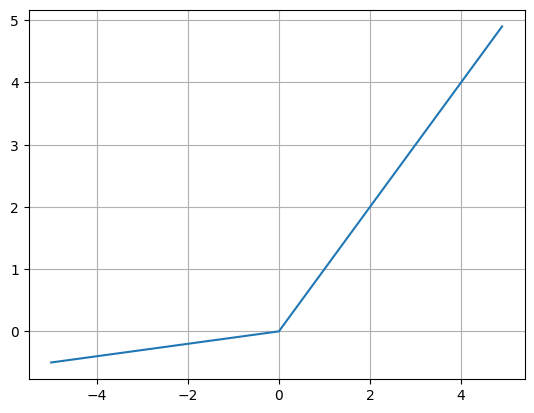

In [35]:
# with torch
leaky = torch.nn.LeakyReLU(0.1)
x = torch.arange(-5., 5., 0.1) 
y = leaky(x)

plt.plot(x.numpy(), y.numpy()) 
plt.grid(True)
plt.show()

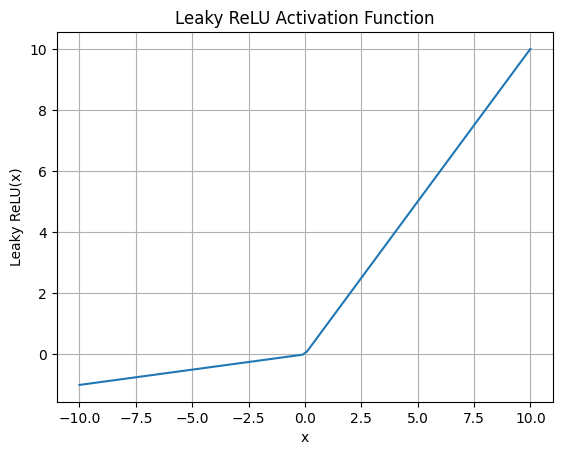

In [37]:
def leaky_relu(x, alpha=0.1):
        return np.where(x >= 0, x, alpha * x)
    
x = np.linspace(-10, 10, 100)
leaky_relu_values = leaky_relu(x)

plt.plot(x, leaky_relu_values)
plt.title("Leaky ReLU Activation Function")
plt.xlabel("x")
plt.ylabel("Leaky ReLU(x)")
plt.grid(True)
plt.show()

### Softmax
Like the sigmoid function, the softmax function squashes the output of each unit to be between 0 and 1. However, the softmax operation also divides each output by the sum of all the outputs, which gives us a discrete probability distribution over k possible classes. It takes a vector of real numbers as input and outputs a probability distribution over multiple classes.

The softmax function normalizes the input values and transforms them into probabilities that sum up to 1. It is commonly used as the activation function in the output layer of a neural network for multi-class classification tasks.

$$
Softmax (x_i)=\frac{e^{x_i}}{\displaystyle\sum\limits_{j=1}^k e^{x_j}}
$$

This is very useful for interpreting outputs for classification tasks, and so this transformation is usually paired with a probabilistic training objective, such as categorical cross entropy.

In [47]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / np.sum(e_x, axis=0)

In [48]:
# with numpy
x = np.array([1, 2, 3])
result = softmax(x)
result

array([0.09003057, 0.24472847, 0.66524096])

In [49]:
print(0.09003057 + 0.24472847 + 0.66524096) # total = 1

1.0


In [50]:
# with torch
softmax = torch.nn.Softmax(dim=1) 
x_input = torch.randn(1, 3) 
y_output = softmax(x_input) 
print(x_input)
print(y_output) 
print(torch.sum(y_output, dim=1))

tensor([[ 0.0778, -1.1815, -0.2942]])
tensor([[0.5068, 0.1439, 0.3494]])
tensor([1.])


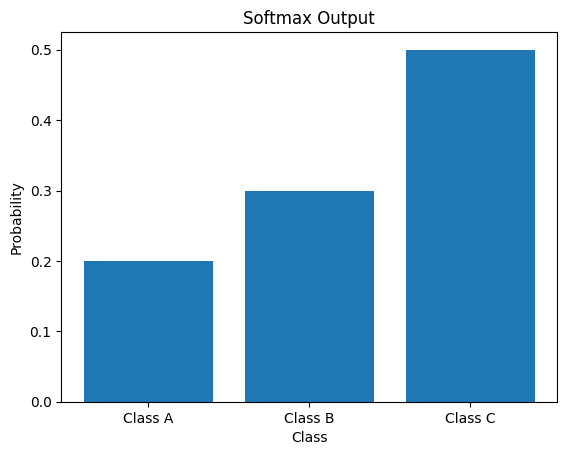

In [51]:
class_labels = ["Class A", "Class B", "Class C"]
probabilities = np.array([0.2, 0.3, 0.5])


plt.bar(class_labels, probabilities)
plt.xlabel("Class")
plt.ylabel("Probability")
plt.title("Softmax Output")
plt.show()